## Wave equation

(Don't miss the fun example in Section 12.1, the advection equation applied to traffic jams.)

Now we'll solve the wave equation,

$$u_{tt} = c^2u_{xx},$$

where $c$ is the speed of the wave (e.g., light).

We need boundary conditions ($u(0, t) = u(1, t) = 0$) and initial conditions on $u(x,0)$ and $u_x(x,0)$.

Note that if $\phi(x)$ is a solution then so are $\phi(x-ct)$ and $\phi(x+ct)$. So any initial solution can move at speed $c$ forward or backward along the $x$ axis.

We solve the equation by discretization in space (using Chebyshev nodes), using method of lines again and solving a set of IVPs using Runge-Kutta methods. First we need to write the second-order in time system as two first order equations. One way is to write $u_t = z_x$ and $z_t = c^2u_x$.

The discrete equations are $u_t = D_x z$ and $z_t = c^2 D_x u$. We can pack these into a block matrix and use the familiar Chebyshev differentiation matrices. We still have to modify the differentiation matrix to enforce the boundary conditions as before.

In [1]:
using LinearAlgebra, Plots, LaTeXStrings, DifferentialEquations, Printf
include("fnc.jl")

bvp

In [2]:
m = 200
x,Dₓ = diffcheb(m,[-1, 1]);

These functions will help us modify the differentiation matrices to include boundary conditions.

In [3]:
extend = v -> [0;v;0]  # will force u(0,t) = u(1,t) = 0
chop = u -> u[2:m];

In [4]:
ode = function(w, c, t)
    u = extend(w[1:m-1])
    z = w[m:2m]
    dudt = Dₓ*z
    dzdt = c^2*(Dₓ*u)
    return [ chop(dudt); dzdt ]
end;

In [13]:
u_init = @. exp(-100*(x+0.0)^2)
# u_init = @. max.(0.0, 1-abs(3*x))
z_init = 0 .* -u_init # textbook uses a 1 here, changes how wave splits
w_init = [ chop(u_init); z_init ];  

In [14]:
c = 2.0
IVP = ODEProblem(ode, w_init, (0.,4.), c)
w = solve(IVP, RK4());

Plot the solution for $u$ only. What happens as you change $c$?

In [15]:
anim = @animate for t in range(0,4,length=180)
    plot(x,extend(w(t)[1:m-1]),label=@sprintf("t=%.3f",t),
        xaxis=(L"x"),yaxis=([-1,1],L"u(x,t)"),dpi=100,    
        title="Wave equation")
end
mp4(anim, "wave-boundaries.mp4")

[ Info: Saved animation to /Users/airwin/Dropbox/Teaching/M3210 Numerical Analysis/2023W/notebooks/wave-boundaries.mp4


Plots.AnimatedGif("/Users/airwin/Dropbox/Teaching/M3210 Numerical Analysis/2023W/notebooks/wave-boundaries.mp4")

We can use colour to indicate $u$, the height of the wave, and then plot a static image of height as a function of space and time.

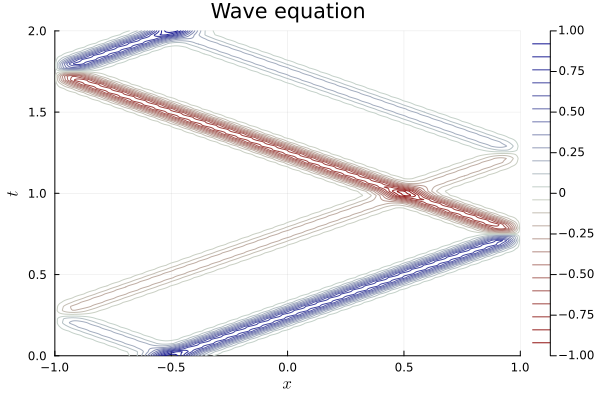

In [12]:
t = range(0,2,length=80)
U = [extend(w(τ)[1:m-1]) for τ in t]
contour(x, t, hcat(U...)', color=:redsblues, clims=(-1,1),
    levels=24, xlabel=L"x", ylabel=L"t", title="Wave equation",
    right_margin=3Plots.mm)

Question 12.4.4.

Modify the system so that the derivative is 0 at the end points and position is constant on the boundary.

In [24]:
extend = v -> [z_init[1]; v; z_init[m+1]]  
ode = function(w, c, t)
    u = w[1:(m+1)]
    z = extend(w[(m+2):2m])
    dudt = Dₓ*z
    dzdt = c^2*(Dₓ*u)
    return [ dudt; chop(dzdt) ]
end;

In [25]:
IVP = ODEProblem(ode, w_init, (0.,2.), 2)
w = solve(IVP,RK4());

In [28]:
anim = @animate for t in range(0,2,length=120)
    plot(x,extend(w(t)[1:m-1]),label=@sprintf("t=%.3f",t),
        xaxis=(L"x"),yaxis=([-0.1,1.2],L"u(x,t)"),dpi=100,    
        title="Wave equation")
end
mp4(anim, "wave-boundaries.mp4")

[ Info: Saved animation to /Users/airwin/Dropbox/Teaching/M3210 Numerical Analysis/2023W/notebooks/wave-boundaries.mp4


Plots.AnimatedGif("/Users/airwin/Dropbox/Teaching/M3210 Numerical Analysis/2023W/notebooks/wave-boundaries.mp4")

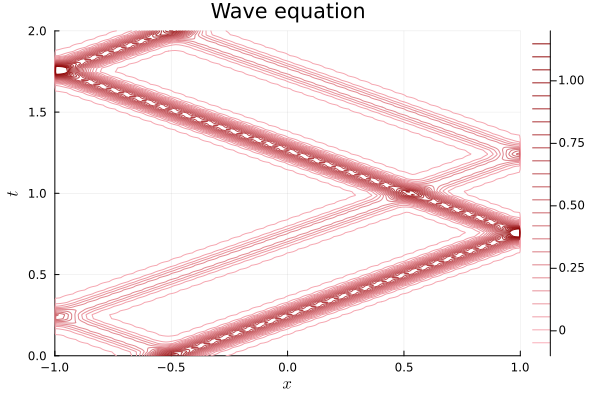

In [29]:
t = range(0,2,length=80)
U = [extend(w(τ)[1:m-1]) for τ in t]
contour(x, t, hcat(U...)', color=:reds, clims=(-0.1,1.2),
    levels=24, xlabel=L"x", ylabel=L"t", title="Wave equation",
    right_margin=3Plots.mm)